In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model
import matplotlib as mpl

In [2]:
data =pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx')
a = np.arange(2000,2018)
pop = [str(i)+'Pop' for i in a]
inv_times = [str(i)+'总投资次数' for i in a]
city=data['City'].drop_duplicates().values###获取城市
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题

In [3]:
dataTimes = data.iloc[:,3+27:3+27*2]###投资次数
sumTimes = dataTimes.sum(axis=1)

In [4]:
len(sumTimes)

276

In [5]:
cp=dict(zip(city,sumTimes))###dic(city,money/times)
cpSortList = sorted( cp.items(),key = lambda x:x[1],reverse = True)
y=[]
x=[]
Y=[]
X=[]
cityName=[]
for i in range(len(city)):
    if np.log10(cpSortList[i][1]) > 0:
        y.append(cpSortList[i][1])
        x.append(i+1)
        X.append(np.log10(i+1))
        Y.append(np.log10(cpSortList[i][1]))
        cityName.append(city[i])

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [6]:
len(y),len(x)

(241, 241)

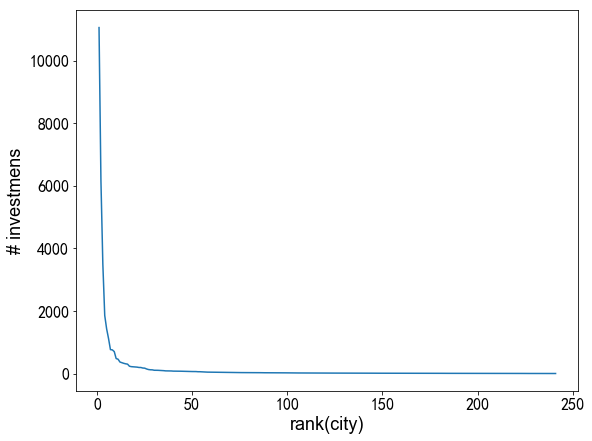

In [7]:
#### Amount 均值
fig=plt.figure(figsize=(9,7))
###设置颜色
# cm1 = list(sns.color_palette("Reds", len(cityName)))###蓝色
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 18,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
plt.xlabel('rank(city)',font2)
plt.ylabel('# investmens',font2)
plt.plot(x,y)
# plt.savefig('E:/vcdata/pic/picSC/Fig5_ea(logzipfAmount).pdf', bbox_inches='tight')

In [8]:
###########最小二乘拟合########3
### 6.最小二乘拟合
from scipy.optimize import leastsq  ##引入最小二乘法算法
from sklearn.metrics import r2_score
#需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y
def picNH2(Yt1,Yt2,num):
    ###过滤掉后面的尾巴
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    yt1 = []
    yt2 = []
    for i in range(len(Yt1)):###将重尾的去掉
        if Yt1[i] < num:
            yt1.append(Yt1[i])
            yt2.append(Yt2[i])
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点
    #读取结果
    k,b=Para[0] 
    y = [round(k*x+b,2) for x in Yt1]
    k1=round(k, 2)
    return(k,y)

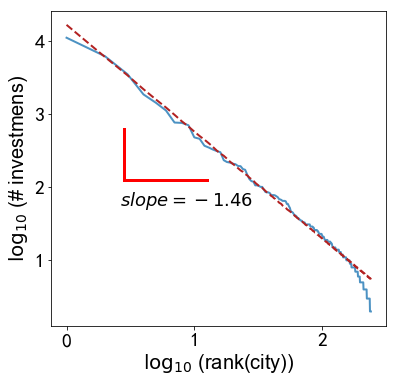

In [12]:
#### Amount 均值
NH = picNH2(X,Y,2.3)
fig=plt.figure(figsize=(6,5.8))
###设置颜色
# cm1 = list(sns.color_palette("Reds", len(cityName)))###蓝色
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 20,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=20) #刻度字体大小13
plt.xlabel('$\log_{10}$'+ ' (rank(city))',font2)
plt.ylabel('$\log_{10}$'+' (# investmens)',font2)
plt.plot(X,Y,linewidth=2,alpha=0.8)
plt.plot(X,NH[1], linewidth=2, linestyle='--',color = 'firebrick')
plt.text(0.42, 1.75, r'$slope={} $'.format("%.2f" % NH[0]),size=18)
plt.plot([0.45,1.1],[2.1,2.1],color='red',linewidth=3)
plt.plot([0.45,0.45],[2.1,2.8],color='red',linewidth=3)
# plt.savefig('E:/vcdata/pic/picSC/Fig1f.pdf', bbox_inches='tight')
plt.savefig('E:/0论文/1picture/2_7.png',dpi=500, bbox_inches='tight')